In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = pd.read_csv('salary.csv')
data.dropna()

data.head(n=3)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2


In [28]:
data = pd.read_csv('salary.csv')

df = data.drop(['degree','otherqual','position','male','Field'], axis=1)

# Remove Nan values
data.dropna(how='any',axis=0)

df.shape

y = df.salary

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(411, 6)
(103, 6)


In [103]:
from plotly import tools
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#1.Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

init_notebook_mode(connected=True)

df = pd.read_csv('salary.csv')
df.dropna()

Experience = go.Bar(
    x=df.exprior,
    y=df.salary,
    
)
Year_Worked = go.Bar(
    x=df.yearsworked,
    y=df.salary,
    xaxis='x2',
    yaxis='y2'
)
Degree = go.Bar(
    x=df.degree,
    y=df.salary,
    xaxis='x3',
    yaxis='y3'
)
Year_Rank = go.Bar(
    x=df.yearsrank,
    y=df.salary,
    xaxis='x4',
    yaxis='y4'
)
data = [Experience, Year_Worked, Degree, Year_Rank]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
        
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Table of the variables of interest')



"plt.subplot(2,3,1)\nplt.hist(df['salary'], bins=40)\nplt.title('exprior')\n\nplt.subplot(2,3,2)\nplt.hist(df['yearsworked'], bins=40)\nplt.title('years worked')\n\nplt.subplot(2,3,3)\nplt.hist(df['yearsrank'], bins=40)\nplt.title('years rank')\n          \nplt.subplot(2,3,4)\nplt.hist(df['market'], bins=40)\nplt.title('market')\n\nplt.subplot(2,3,5)\nplt.hist(df['yearsabs'], bins=40)\nplt.title('years abs')"

In [38]:
#descriptive statistics table of the variables of interest
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [79]:
#2.	One-hot encode the variable Field into three dummy variables, 
#using HR as the reference category. You can use `pandas`' get_dummies() function for this.
import pandas as pd

data = pd.read_csv('salary.csv')
data.dropna()

dummy = pd.get_dummies(data['position'])

dummy.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [42]:
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

#3.	Produce a correlation matrix comparing the relationship of salary to the predictor variables. 
#Is there any multicollinearity or other problems that may be a problem in the multiple regression?

trace = go.Heatmap(z=corr,
                   x=corr.columns.values,
                   y=corr.columns.values)
data=[trace]
iplot(data, filename='labelled-heatmap')



In [47]:

#4.	Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. 
#What are the most important features when predicting employee salary?

lm = smf.ols(formula='salary ~ yearsworked + yearsrank + market + yearsabs', data=df_train).fit()

# print the coefficients
lm.params



Intercept       5684.047724
yearsworked      585.359805
yearsrank        522.179618
market         35951.340296
yearsabs         -30.614436
dtype: float64

In [104]:
import statsmodels.api as sm
#5.	Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

predictions = model.predict()
residuals = lm.resid()


TypeError: 'Series' object is not callable

In [56]:
lm.fittedvalues.head()

25     40613.230838
394    48822.425132
62     39525.769392
6      55714.410709
54     36660.199238
dtype: float64

NameError: name 'mpl_to_plotly' is not defined

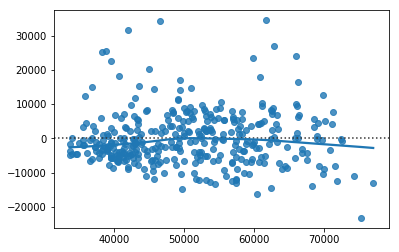

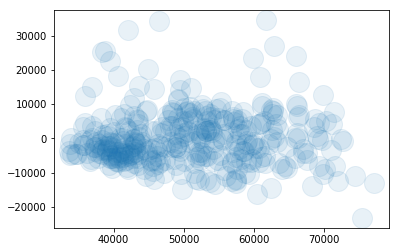

In [58]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

#6. Plot the residuals versus the predicted values using,

x = lm.fittedvalues
y = lm.resid

alpha = plt.figure()

plt.scatter(x, y, alpha=.1, s=400)

fig_plt = mpl_to_plotly(alpha)
plot(fig_plt, filename = 'Predictions Vs Residuals')

In [108]:
import pandas as pd
#plt.hist(X_train['salary'],data=X_train, bins=20)

data = pd.read_csv('salary.csv')

df = data.drop(['degree','otherqual','position','male','Field'], axis=1)

# Remove Nan values
data.dropna(how='any',axis=0)

df.shape

y = df.salary

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

trace = go.Bar(
    x = X_train,
    y = X_train['salary']
)

data = [trace]

iplot(data, filename='basic-line')

In [71]:
import statsmodels.api as sm 

x = X_train
x = sm.add_constant(x)

#Train
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.582e+32
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        12:13:35   Log-Likelihood:                 9614.0
No. Observations:                 411   AIC:                        -1.922e+04
Df Residuals:                     405   BIC:                        -1.919e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
salary          1.0000   1.21e-16   8.24e+15      0.000       1.000       1.000
exprior      4.547e-13   2.13e-13      2.139      0.033    3.68e-14    8.73e-13
yearsworked  2.842e-13   1.83e-13      1.550      0.122   -7.63e-14    6.45e-13
yearsrank     1.99e-13    2.3e-13      0.866      0.387   -2.53e-13    6.51e-13
market      -1.819e-12   4.94e-12     -0.369      0.713   -1.15e-11    7.88e-12
yearsabs     2.132e-14   5.07e-14      0.421      0.674   -7.83e-14    1.21e-13
==============================================================================
Omnibus:                       37.508   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.559
Skew:                          -0.411   Prob(JB):                     2.08e-05
Kurtosis:                       2.237   Cond. No.                     3.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
import statsmodels.api as sm 
#7. How does your model compare when running it on the test set
#MODEL

x = df_train
x = sm.add_constant(x)

#Train
#model = sm.OLS(y_train,X_train).fit()


lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     138.8
Date:                Fri, 10 May 2019   Prob (F-statistic):           4.13e-71
Time:                        11:21:29   Log-Likelihood:                -3722.5
No. Observations:                 358   AIC:                             7455.
Df Residuals:                     353   BIC:                             7474.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5684.0477   2932.590      1.938      0.053     -83.498    1.15e+04
yearsworked   585.3598     76.834      7.618      0.000     434.249     736.470
yearsrank     522.1796    112.852      4.627      0.000     300.233     744.126
market       3.595e+04   2940.901     12.225      0.000    3.02e+04    4.17e+04
yearsabs      -30.6144     24.799     -1.234      0.218     -79.387      18.159
==============================================================================
Omnibus:                       80.109   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.243
Skew:                           1.107   Prob(JB):                     2.19e-41
Kurtosis:                       5.766   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

#7. How does your model compare when running it on the test set
#TEST

lm = smf.ols(formula='salary ~ yearsworked + yearsrank + market + yearsabs', data=df_test).fit()

# print the coefficients
lm.params

#df_test.summary()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     65.97
Date:                Fri, 10 May 2019   Prob (F-statistic):           4.25e-32
Time:                        11:25:39   Log-Likelihood:                -1604.0
No. Observations:                 155   AIC:                             3218.
Df Residuals:                     150   BIC:                             3233.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1528.7953   4147.267      0.369      0.713   -6665.811    9723.401
yearsworked   602.0638    116.093      5.186      0.000     372.674     831.453
yearsrank     545.7405    169.106      3.227      0.002     211.603     879.878
market       4.001e+04   4088.232      9.786      0.000    3.19e+04    4.81e+04
yearsabs       -3.0117     39.671     -0.076      0.940     -81.399      75.375
==============================================================================
Omnibus:                       15.657   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.762
Skew:                           0.705   Prob(JB):                     0.000139
Kurtosis:                       3.873   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""